In [1]:
import numpy as np
import math as mth
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from textblob import TextBlob

C:\Users\quochung.huynh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
## Import data
df=pd.read_csv("C:/Users/quochung.huynh/Downloads/Q3_data.csv")
df.head()

,ID,Timestamp,UI_version,source,messages,cutomer_satisfaction
0,50424,11/20/2023 6:04:02,v1,fb_messenger,"{\n ""chatbot"": ""Welcome! If you're look...",not sastisfy
1,50425,11/20/2023 6:11:05,v1,website,"{\n ""customer"": ""I thought this razor w...",sastisfy
2,50426,11/20/2023 6:14:57,v1,website,"{\n ""customer"": ""Hey, I need to report ...",sastisfy
3,50427,11/20/2023 6:26:05,v1.1.2,website,"{\n ""customer"": ""Can you point me towar...",sastisfy
4,50428,11/20/2023 6:26:19,v2.sp,tiktok,"{\n ""chatbot"": ""Good day! How can I hel...",sastisfy


In [3]:
for value in sorted(df['Timestamp'].unique(), reverse=True):
    print(value)

Thursday, November 23, 2023, 3:42:39 PM
Thursday, November 23, 2023, 3:39:02 PM
Thursday, November 23, 2023, 3:37:48 PM
Nov/23/23 7:09:15
Nov/23/23 7:08:34
Nov/23/23 7:07:44
Nov/23/23 14:02:00
Nov/23/23 13:54:27
Nov/23/23 13:50:55
Nov/23/23 13:47:37
Nov/23/23 13:46:45
Nov/23/23 13:45:47
Nov/23/23 13:45:03
Nov/23/23 13:42:34
Nov/21/23 17:49:27
Nov/21/23 17:49:07
Nov/21/23 17:45:04
Nov/20/23 9:47:55
Nov/20/23 12:41:26
Nov/20/23 12:31:11
Nov/20/23 12:26:30
11/26/2023 9:9:35
11/26/2023 9:9:0
11/26/2023 9:8:41
11/26/2023 9:8:38
11/26/2023 9:7:54
11/26/2023 9:6:3
11/26/2023 9:56:59
11/26/2023 9:55:7
11/26/2023 9:55:44
11/26/2023 9:53:30
11/26/2023 9:52:33
11/26/2023 9:51:26
11/26/2023 9:4:47
11/26/2023 9:46:37
11/26/2023 9:45:0
11/26/2023 9:44:38
11/26/2023 9:40:17
11/26/2023 9:3:40
11/26/2023 9:3:25
11/26/2023 9:38:2
11/26/2023 9:37:2
11/26/2023 9:30:0
11/26/2023 9:29:40
11/26/2023 9:28:7
11/26/2023 9:27:46
11/26/2023 9:26:35
11/26/2023 9:23:35
11/26/2023 9:22:9
11/26/2023 9:19:6
11/26/2023

In [4]:
df['Timestamp_formatted'] = pd.to_datetime(df['Timestamp'], errors='coerce')
print(df[['Timestamp', 'Timestamp_formatted']].sort_values(by='Timestamp', ascending=False))

                                    Timestamp Timestamp_formatted
1061  Thursday, November 23, 2023, 3:42:39 PM 2023-11-23 15:42:39
1060  Thursday, November 23, 2023, 3:39:02 PM 2023-11-23 15:39:02
1059  Thursday, November 23, 2023, 3:37:48 PM 2023-11-23 15:37:48
875                         Nov/23/23 7:09:15 2023-11-23 07:09:15
874                         Nov/23/23 7:08:34 2023-11-23 07:08:34
...                                       ...                 ...
84                        11/20/2023 10:20:20 2023-11-20 10:20:20
83                        11/20/2023 10:17:07 2023-11-20 10:17:07
82                        11/20/2023 10:14:31 2023-11-20 10:14:31
81                        11/20/2023 10:12:19 2023-11-20 10:12:19
80                        11/20/2023 10:05:26 2023-11-20 10:05:26

[2016 rows x 2 columns]


In [5]:
def detect_customer_satisfaction(message):
    blob = TextBlob(message)
    sentiment_polarity = blob.sentiment.polarity

    # Define a threshold for sentiment polarity
    threshold = 0.0

    # Determine customer satisfaction based on the sentiment polarity
    if sentiment_polarity >= threshold:
        return 'satisfy'
    else:
        return 'not satisfy'

In [6]:
df.loc[df['cutomer_satisfaction'].isnull(), 'cutomer_satisfaction'] = df.loc[df['cutomer_satisfaction'].isnull(), 'messages'].apply(detect_customer_satisfaction)

In [7]:
df['cutomer_satisfaction'].unique()

array(['not sastisfy', 'sastisfy', 'not happy', 'satisfy', 'not satisfy'],
      dtype=object)

There are typo in the column which lead to many values. I will simplify into 2 labels 'not sastisfy', 'sastisfy' only

In [8]:
df['cutomer_satisfaction'] = np.where(df['cutomer_satisfaction'] == 'satisfy', 'satisfy', 'not satisfy')
df['cutomer_satisfaction'].unique()

array(['not satisfy', 'satisfy'], dtype=object)

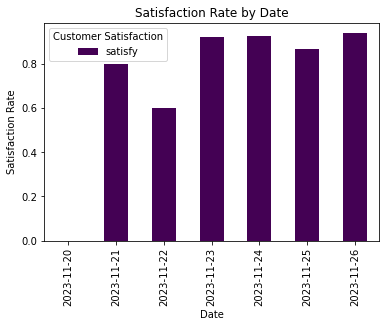

In [9]:
satisfaction_rate = df.groupby(df['Timestamp_formatted'].dt.date)['cutomer_satisfaction'].value_counts(normalize=True).unstack().fillna(0)['satisfy']
satisfaction_rate.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Satisfaction Rate by Date')
plt.xlabel('Date')
plt.ylabel('Satisfaction Rate')
plt.legend(title='Customer Satisfaction')
plt.show()